In [1]:
import matplotlib.pyplot as plt

from rdkit import Chem
from rdkit.Chem import rdForceFieldHelpers, rdMolAlign
from rdkit.Chem.Draw import IPythonConsole

from molclub import conf_gen, mmff

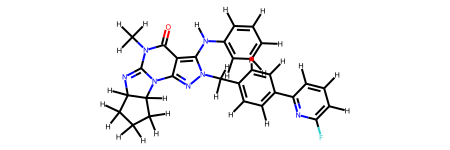

In [2]:
mol = Chem.MolFromSmiles('CN1C(=O)C2=C(N(N=C2N3C1=NC4C3CCC4)CC5=CC=C(C=C5)C6=NC(=CC=C6)F)NC7=CC=CC=C7')
mol = Chem.AddHs(mol)
mol

In [3]:
mols, energies = conf_gen.rdkit_conf_gen(mol)
len(mols)

KeyboardInterrupt: 

In [7]:
mols = conf_gen.etkdg(mol)
mols, energies = conf_gen.opt_mmff(mols, max_iters=220)
mols, _ = conf_gen.prune(mols)

In [9]:
len(mols)

114

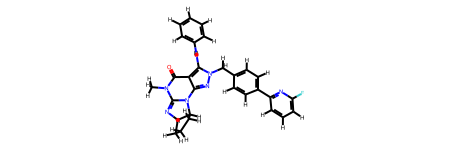

[118.7277341743017,
 132.33704430629194,
 179.96841505325423,
 139.7610352842635,
 119.66928986410856,
 172.24450526571826,
 112.7372848310422,
 140.65204067814284,
 135.32717970574151,
 142.70693915934342]

In [4]:
mols = conf_gen.etkdg(mol, 100)
energies = [mmff.get_mmff_energy(mol) for mol in mols]
display(mols[0])
display(energies[:10])

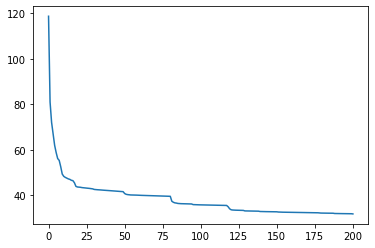

In [6]:
# for mol in mols[:10]:
#     steps, energies = mmff.get_mmff_trajectory(mol, 25)
#     plt.plot(steps, energies)
#     plt.show()

steps, energies = mmff.get_mmff_trajectory(mols[0])
plt.plot(steps, energies)
plt.show()

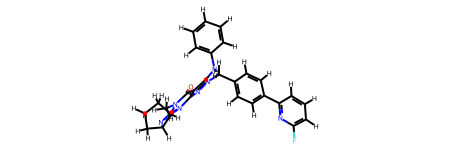

(27.42031631474877,
 28.900616045675108,
 30.42750338777031,
 30.72725497048045,
 31.17426447224233,
 32.77457265708035,
 33.49902930364895,
 33.82203123370918,
 33.87809074881331,
 34.16528159943057)

In [16]:
mols, energies = conf_gen.opt_mmff(mols)
display(mols[0])
energies[:10]

In [19]:
mols = conf_gen.prune_conformers(mols, prune_rms_thresh=0.05)
len(mols)

77

In [20]:
mols, energies = conf_gen.opt_mmff(mols, max_iters=200)
print(len(mols))
energies[:10]

77


(13.45537843115144,
 13.455378746844982,
 13.740063492253128,
 13.740434273738346,
 13.767732494184374,
 13.805553529156347,
 13.850853216619324,
 13.86011901367654,
 13.888231086189304,
 13.939033236611362)

In [23]:
mols = conf_gen.prune_conformers(mols, prune_rms_thresh=0.5)
len(mols)

57

In [27]:
for i in range(len(mols) - 1):
    print(rdMolAlign.GetBestRMS(Chem.RemoveHs(mols[i]), Chem.RemoveHs(mols[i+1])))

0.8758862373287933
1.80840032288248
1.7436738834273309
1.1890322348499824
2.630133228370427
2.691024027600363
2.297608026847001
2.524950870809137
2.4909339724570074
1.0652688195681548
1.8137905733519355
1.9568025028306306
1.5151662822870484
1.7290110307065487
1.9876102018509916
1.9208589278512367
1.3507055259720795
0.6209248046553194
2.6363602762062937
2.63966992068654
2.6011199995230334
1.2798313680974247
2.7266432017753024
2.6003177870083047
2.367019032329371
2.0335285085933297
1.3902540131684946
1.3889451023478463
1.9839761036536514
2.0208464853871004
0.8302189549421385
2.4570195801865524
1.4608084902884906
1.9209401589833264
2.498487387151512
2.418598398089415
1.2388209005453106
1.3548028751575305
2.5696874412289654
1.4476840550421468
0.9086473745338669
1.1499734997537006
2.5876327997261033
1.7983422179449757
2.382602657190561
2.4324648615487434
2.392181736713481
2.418763931802757
2.487931855026943
2.485029182304769
2.4426311346371796
1.3102456237266848
2.363911746503907
2.06226472

In [ ]:
def ttt(mol):
    mols = conf_gen.etkdg(mol, num_confs=100, prune_rms_thresh=-1)
    mols = conf_gen.opt_mmff(mols, max_iters=20)